# Week 11 handin

# Assignment
Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

### 02 Status
I completed every exercise from part 1.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

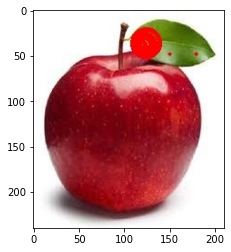

In [2]:
apple = cv2.imread('red_apple.jpeg')
apple_rgb = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
plt.imshow(apple_rgb)
apple_gray = cv2.cvtColor(apple_rgb, cv2.COLOR_BGR2GRAY)
#plt.imshow(apple_gray) 

(240, 210)


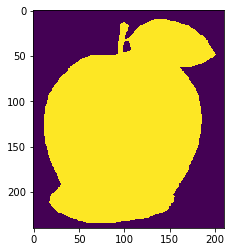

In [3]:
print(apple_gray.shape)
thresh = 220 # The lower the threshhold the more details we get
ret, thresh_img = cv2.threshold(apple_gray, thresh, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_contours = np.zeros(apple.shape)
cv2.drawContours(img_contours, contours, -1, (255,255,255), 2)
#plt.imshow(thresh_img, interpolation='none')
plt.imshow(thresh_img, interpolation='none')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


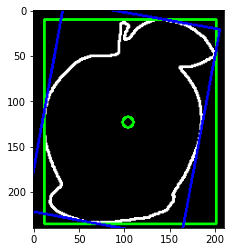

In [4]:
img_contours
#contours
cnt = contours[0]
M = cv2.moments(cnt)

area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(cnt)
k = cv2.isContourConvex(cnt)

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img_contours,(x,y),(x+w,y+h),(0,255,0),2)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_contours,[box],0,(0,0,255),2)

(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius*0.05)
cv2.circle(img_contours,center,radius,(0,255,0),2)

plt.imshow(img_contours)

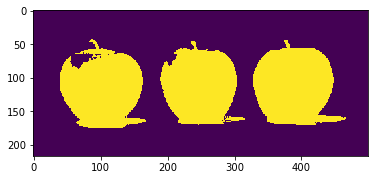

In [8]:
three_apples = cv2.imread("three_apples.jpg")
three_apples_gray = cv2.cvtColor(three_apples, cv2.COLOR_BGR2GRAY)
plt.imshow(three_apples_gray)

thresh = 230 # The lower the threshhold the more details we get
ret, thresh_img = cv2.threshold(three_apples_gray, thresh, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

three_img_contours = np.zeros(apple.shape)
cv2.drawContours(three_img_contours, contours, -1, (255,255,255), 2)
#plt.imshow(thresh_img, interpolation='none')
plt.imshow(thresh_img, interpolation='none')
#three_img_contours

There are 3 apples


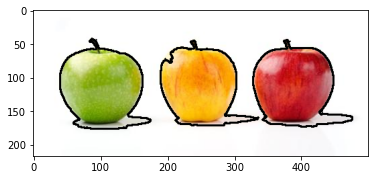

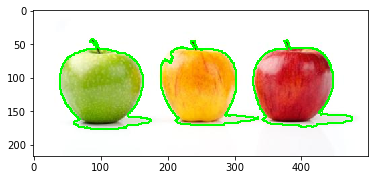

In [12]:
img = cv2.cvtColor(cv2.imread('three_apples.jpg', 1), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(three_apples, cv2.COLOR_BGR2GRAY)

thresh = 240
ret, thresh_img = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY_INV)


# find contours on the result above
(contours, hierarchy) = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apples')